In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
DATA_PATH = "project_data_files"
COUNTVEC_PATH = f"{DATA_PATH}/book_text_features_countvec"
DOC2VEC_PATH = f"{DATA_PATH}/book_text_features_doc2vec"

train = pd.read_csv(f"{DATA_PATH}/book_rating_train.csv")
test_X = pd.read_csv(f"{DATA_PATH}/book_rating_test.csv")

train_authors_doc2vec = pd.read_csv(f"{DOC2VEC_PATH}/train_authors_doc2vec20.csv", header=None).add_prefix("authors")
train_desc_doc2vec = pd.read_csv(f"{DOC2VEC_PATH}/train_desc_doc2vec100.csv", header=None).add_prefix("descs")
train_name_doc2vec = pd.read_csv(f"{DOC2VEC_PATH}/train_name_doc2vec100.csv", header=None).add_prefix("names")

test_authors_doc2vec = pd.read_csv(f"{DOC2VEC_PATH}/test_authors_doc2vec20.csv", header=None).add_prefix("authors")
test_desc_doc2vec = pd.read_csv(f"{DOC2VEC_PATH}/test_desc_doc2vec100.csv", header=None).add_prefix("descs")
test_name_doc2vec = pd.read_csv(f"{DOC2VEC_PATH}/test_name_doc2vec100.csv", header=None).add_prefix("names")

In [17]:
train

,Name,Authors,PublishYear,PublishMonth,PublishDay,Publisher,Language,pagesNumber,Description,rating_label
0,Best of Dr Jean: Reading & Writing,Jean R. Feldman,2005,6,1,Teaching Resources,NaN,48,Teachers will turn to this treasury of ideas a...,4.0
1,Here All Dwell Free,Gertrud Mueller Nelson,1991,10,1,DoubleDay,NaN,364,Every human being lives a fairy tale -- an unc...,4.0
2,Boomer's Big Surprise,Constance W. McGeorge,2005,3,31,Chronicle Books,NaN,32,<i>Boomer's Big Surprise</i> will have special...,4.0
3,"I'll Go and Do More: Annie Dodge Wauneka, Nava...",Carolyn Niethammer,2004,9,1,Bison Books,NaN,293,<i>I'll Go and Do More</i> is the story of Ann...,4.0
4,Us,Richard Mason,2005,7,7,Penguin Books Ltd,eng,352,"Since their days at Oxford, they've gone their...",3.0
...,...,...,...,...,...,...,...,...,...,...
23058,Black Coffee Blues,Henry Rollins,1997,8,1,2.13.61,eng,120,"""If I lose the light of the sun, I will write ...",4.0
23059,America's Champion Swimmer: Gertrude Ederle,David A. Adler,2005,6,1,HMH Books for Young Readers,NaN,32,"Trudy Ederle loved to swim, and she was determ...",4.0
23060,Crime and Custom in Savage Society,Bronisław Malinowski,1989,2,15,Rowman & Littlefield Publishers,NaN,132,Bronislaw Malinowski achieved international re...,4.0
23061,The Name and Nature of Poetry and Other Select...,A.E. Housman,1998,4,21,New Amsterdam Books,NaN,136,Lovers of Housman's poetry and admirers of his...,4.0


# Feature Exploration

## 1. Language

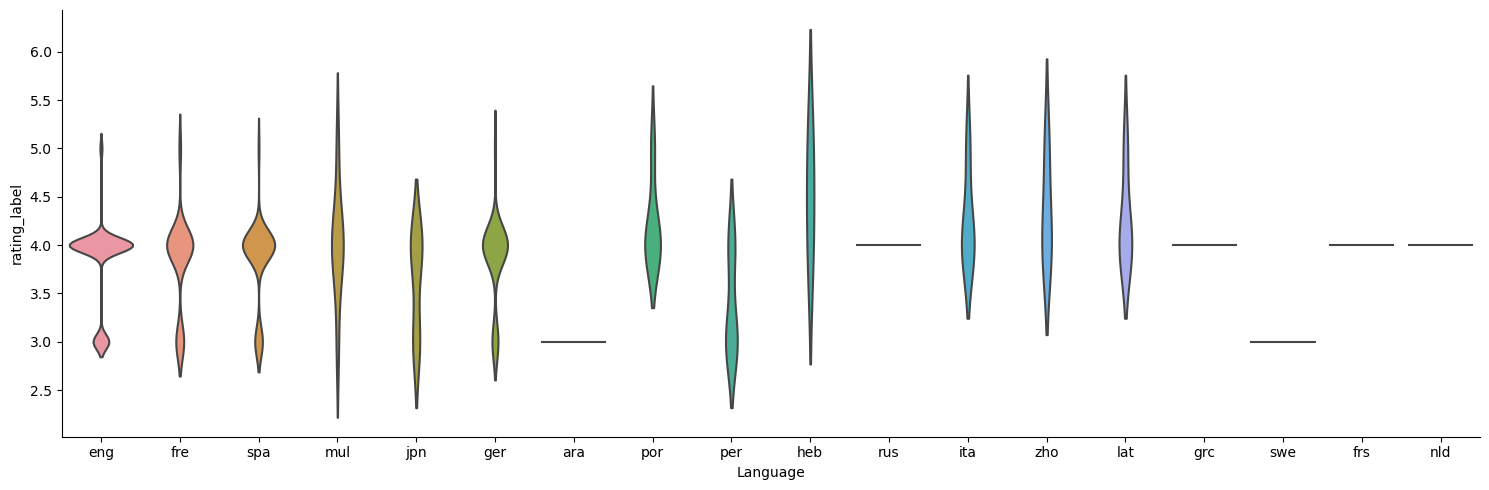

In [12]:
sns.catplot(
    data=train[["Language", "rating_label"]],
    x="Language", y="rating_label",
    kind="violin", height=5, aspect=3, inner=None
)
plt.show()

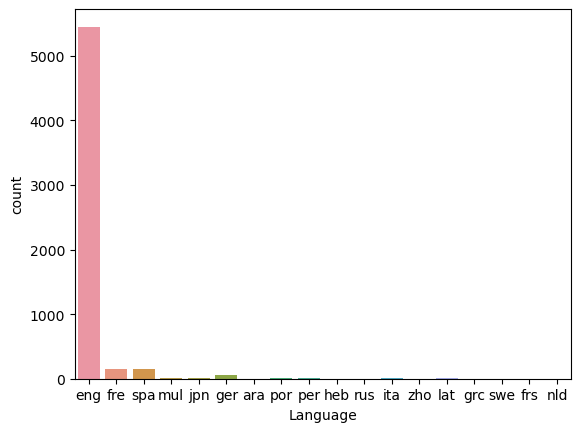

In [13]:
sns.countplot(x=train["Language"])
plt.show()

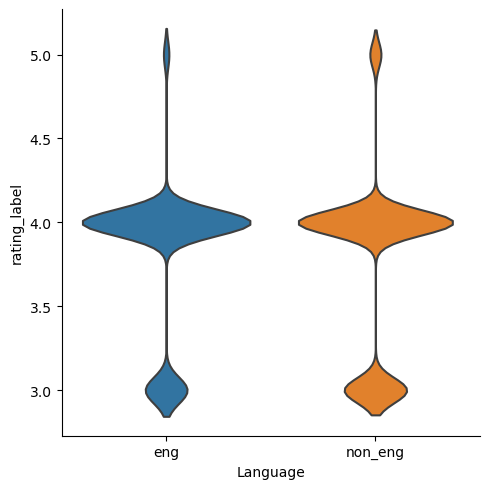

In [24]:
eng_ratings = train[train["Language"] == "eng"]["rating_label"].to_frame()
eng_ratings["Language"] = "eng"

non_eng_ratings = train[train["Language"] != "eng"]["rating_label"].to_frame()
non_eng_ratings["Language"] = "non_eng"

sns.catplot(
    data=pd.concat([eng_ratings, non_eng_ratings]),
    x="Language", y="rating_label",
    kind="violin", height=5, aspect=1, inner=None,
)
plt.show()

## 2. Publish Year/Month/Day

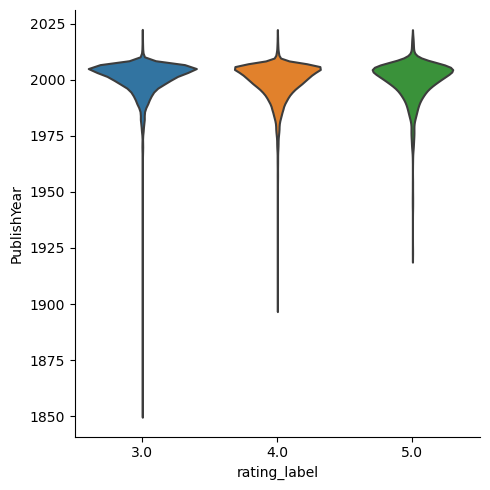

In [25]:
sns.catplot(
    data=train[["PublishYear", "rating_label"]],
    x="rating_label", y="PublishYear",
    kind="violin", height=5, aspect=1, inner=None
)
plt.show()

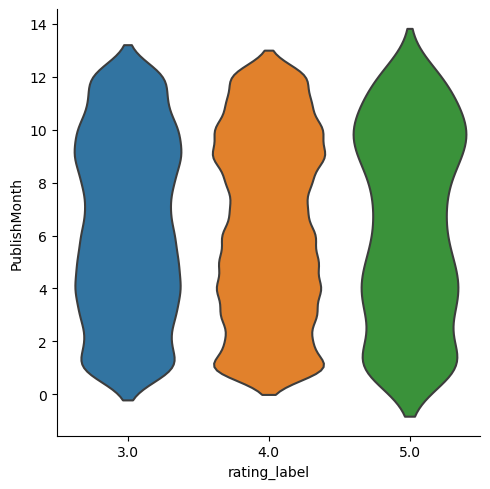

In [31]:
sns.catplot(
    data=train[["PublishMonth", "rating_label"]],
    x="rating_label", y="PublishMonth",
    kind="violin", height=5, aspect=1, inner=None
)
plt.show()

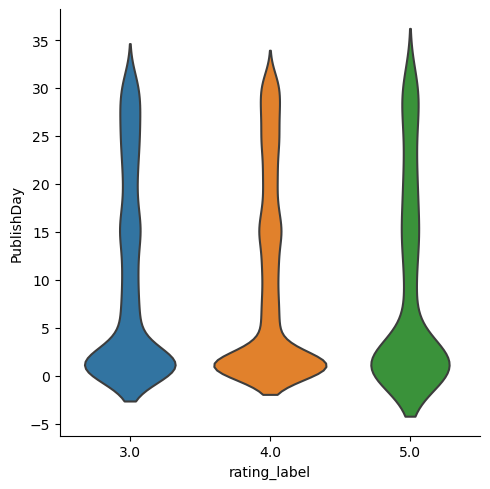

In [30]:
sns.catplot(
    data=train[["PublishDay", "rating_label"]],
    x="rating_label", y="PublishDay",
    kind="violin", height=5, aspect=1, inner=None
)
plt.show()

## 3. Pages Number

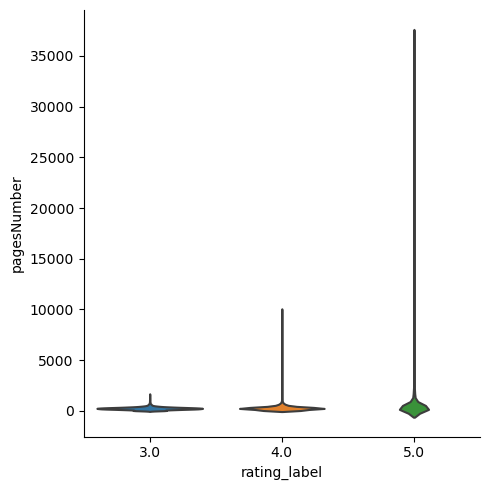

In [33]:
sns.catplot(
    data=train[["pagesNumber", "rating_label"]],
    x="rating_label", y="pagesNumber",
    kind="violin", height=5, aspect=1, inner=None
)
plt.show()

## 4. Publisher

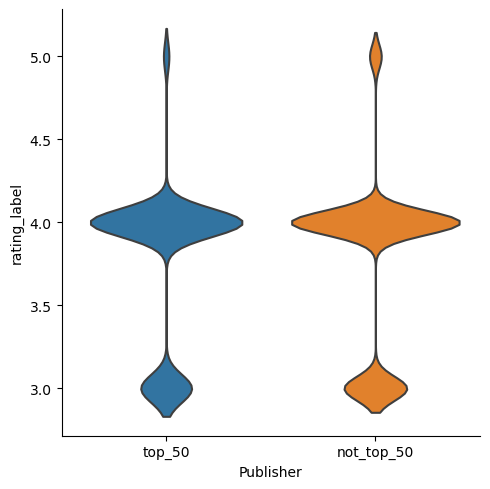

In [92]:
train["Publisher"] = train["Publisher"].fillna('')
top_50_publishers = set(train["Publisher"].value_counts()[:50].index)

rating_top_50_publishers = train[train["Publisher"].isin(top_50_publishers)]["rating_label"].to_frame()
rating_top_50_publishers["Publisher"] = "top_50"

rating_not_top_50_publishers = train[~train["Publisher"].isin(top_50_publishers)]["rating_label"].to_frame()
rating_not_top_50_publishers["Publisher"] = "not_top_50"

sns.catplot(
    data=pd.concat([rating_top_50_publishers, rating_not_top_50_publishers]),
    x="Publisher", y="rating_label",
    kind="violin", height=5, aspect=1, inner=None,
)
plt.show()

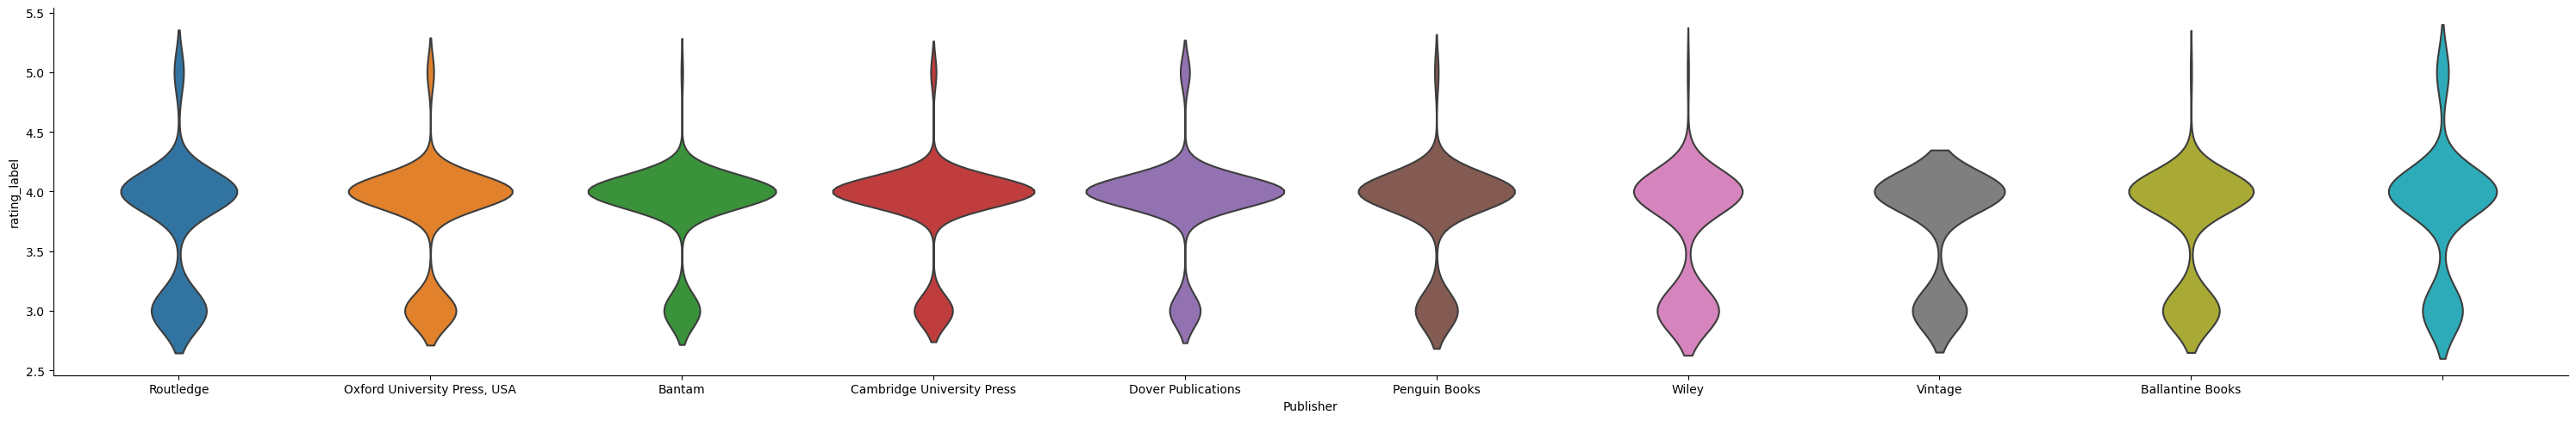

In [93]:
top_10_publishers = set(train["Publisher"].value_counts()[:10].index)
train_top_10_publishers = train[train["Publisher"].isin(top_10_publishers)]

sns.catplot(
    data=train_top_10_publishers,
    x="Publisher", y="rating_label",
    kind="violin", height=5, aspect=6, inner=None,
)
plt.show()

# Data Preprocessing

In [125]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif

def split_X_y(train):
    train_X = train
    train_y = train.pop("rating_label")
    return train_X, train_y

def join_doc2vec(X, name_doc2vec, authors_docvec, desc_doc2vec):
    X = pd.concat([X, name_doc2vec, authors_docvec, desc_doc2vec], axis=1, join='inner')
    X = X.drop(columns=["Name", "Authors",  "Description"])
    return X

def drop_columns(train_X, test_X, columns):
    train_X = train_X.drop(columns=columns)
    test_X = test_X.drop(columns=columns)
    return train_X, test_X

def normalise(train_X, test_X):
    train_publisher, test_publisher = train_X.pop("Publisher"), test_X.pop("Publisher")
    scaler = StandardScaler().fit(train_X)
    column_names = list(train_X.columns)
    train_X = pd.DataFrame(scaler.transform(train_X), columns=column_names)
    test_X = pd.DataFrame(scaler.transform(test_X), columns=column_names)
    train_X, test_X = pd.concat([train_X, train_publisher], axis=1), pd.concat([test_X, test_publisher], axis=1)
    return train_X, test_X

def encode_publisher(train_X, test_X):
    train_X["Publisher"] = train_X["Publisher"].fillna('')
    top_50_publishers = set(train_X["Publisher"].value_counts().nlargest(50).index)

    train_X.loc[~train_X["Publisher"].isin(top_50_publishers), "Publisher"] = "other"
    test_X.loc[~test_X["Publisher"].isin(top_50_publishers), "Publisher"] = "other"

    publisher_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
    train_publisher_encoded = publisher_encoder.fit_transform(train_X[["Publisher"]])
    test_publisher_encoded = publisher_encoder.transform(test_X[["Publisher"]])

    publisher_column_names = publisher_encoder.get_feature_names_out()
    train_publisher_encoded = pd.DataFrame(train_publisher_encoded, columns=publisher_column_names)
    test_publisher_encoded = pd.DataFrame(test_publisher_encoded, columns=publisher_column_names)

    train_X, test_X = drop_columns(train_X, test_X, ["Publisher"])
    return train_X, test_X

def feature_select(train_X, train_y, test_X):
    selector = SelectKBest(mutual_info_classif, k=150).fit(train_X, train_y)
    column_names = selector.get_feature_names_out()
    train_X = pd.DataFrame(selector.transform(train_X), columns=column_names)
    test_X = pd.DataFrame(selector.transform(test_X), columns=column_names)
    return train_X, test_X

In [ ]:
train_X, train_y = split_X_y(train)
train_X = join_doc2vec(train_X, train_authors_doc2vec, train_desc_doc2vec, train_name_doc2vec)
test_X = join_doc2vec(test_X, test_authors_doc2vec, test_desc_doc2vec, test_name_doc2vec)
train_X, test_X = drop_columns(train_X, test_X, ["Language"])
train_X, test_X = normalise(train_X, test_X)
train_X, test_X = encode_publisher(train_X, test_X)
train_X, test_X = feature_select(train_X, train_y, test_X)

In [127]:
train_X

,PublishYear,PublishMonth,PublishDay,pagesNumber,authors0,authors1,authors2,authors3,authors8,authors10,...,names90,names91,names92,names93,names94,names95,names96,names97,names98,names99
0,0.666095,-0.097031,-0.886272,-0.704553,4.490164,-0.387503,-0.910183,2.103290,-1.705461,1.271196,...,-1.837281,0.626210,-1.046584,1.032888,-1.200818,1.481692,1.294794,-0.572776,-0.480379,2.172327
1,-1.077920,1.055749,-0.886272,0.244701,0.166230,1.057081,0.091543,-0.107297,0.524520,1.836485,...,1.429003,-0.672986,0.161756,-0.288897,-0.771688,0.671005,0.149279,-1.277989,0.873718,-1.391350
2,0.666095,-0.961617,2.042821,-0.752617,-0.358995,-0.424002,0.322202,-0.154711,-0.808003,0.438964,...,-0.752091,0.587199,0.695338,0.366136,-0.096715,0.799212,0.618758,-1.224394,-0.003119,-0.937843
3,0.541523,0.767554,-0.886272,0.031419,0.906830,0.061007,-0.149493,-1.442333,-2.452807,-0.299372,...,-0.326356,-1.551102,0.854776,2.372260,-0.763789,2.011868,0.014959,0.350868,0.300321,1.201576
4,0.666095,0.191164,-0.300453,0.208654,-0.702713,0.290886,0.599323,-0.934224,-0.427063,0.427708,...,1.007458,0.150510,0.000485,-0.059892,-0.443507,0.500031,-0.993233,-0.127340,-0.656853,-0.211648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23058,-0.330485,0.479359,-0.886272,-0.488267,-1.027058,1.084341,0.021726,-0.922820,-0.324237,1.450478,...,-0.491677,-0.789198,-0.057997,0.360950,0.483619,0.259335,-1.116282,-0.889814,1.858203,0.504007
23059,0.666095,-0.097031,-0.886272,-0.752617,-0.243518,0.468069,-1.346655,-0.848325,-0.396630,-1.073486,...,0.689935,-0.492113,1.037096,-0.411959,-0.800676,1.662017,0.487771,0.814817,0.537463,-1.043185
23060,-1.327065,-1.249812,0.480638,-0.452220,-0.351917,-0.603479,0.683580,0.254934,-1.335646,1.511701,...,1.023932,-1.277741,-0.426020,-0.689255,-1.008797,0.926916,0.672753,1.369664,0.902934,-0.166000
23061,-0.205912,-0.673422,1.066457,-0.440204,-0.428117,-0.059143,0.504961,-0.058530,-0.787667,0.767940,...,-0.418104,1.115349,1.465452,-2.187442,-0.888994,-1.186152,0.462429,0.995995,-1.259054,-0.514555


In [128]:
train_final = pd.concat([train_X, train_y], axis=1)
test_final = test_X

train_final.to_csv("train_final.csv", index=False)
test_final.to_csv("test_final.csv", index=False)